In [7]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.rdDetermineBonds import DetermineBonds
from rdkit.Chem import Draw
from rdkit.Chem import AllChem

IPythonConsole.drawOptions.addAtomIndices = True
IPythonConsole.drawOptions.addStereoAnnotation = False
IPythonConsole.drawOptions.centreMoleculesBeforeDrawing = True
IPythonConsole.molSize = 1000,500

In [16]:
def removeAtom(mol, atomNr):
    edFrag = Chem.EditableMol(mol)
    edFrag.RemoveAtom(atomNr)
    return edFrag.GetMol()

def combineMolecules(mol1, mol2, index):
    combo = Chem.CombineMols(mol1, mol2)
    edcombo = Chem.EditableMol(combo)
    a1, a2 = index
    edcombo.AddBond(a1,mol1.GetNumAtoms()+ a2, order=Chem.rdchem.BondType.SINGLE)
    combinedMol = edcombo.GetMol()
    AllChem.EmbedMolecule(combinedMol)
    return combinedMol

def Mol2COM(mol):
    from openbabel import openbabel
    obConversion = openbabel.OBConversion()
    obConversion.SetInAndOutFormats("mol", "com")

    molFile =Chem.MolToMolBlock(mol)
    comFile = openbabel.OBMol()
    obConversion.ReadString(comFile, molFile)
    return obConversion.WriteString(comFile)

def writeCOMFile(fileName, head,coords,tail,comment="COMMENT"):
    with open("test.com", "w") as file:
        file.write(head)
        file.write(f"\n\n{comment}\n\n")
        for line in coords:
            file.write(f"{line}\n")
        file.write(tail)

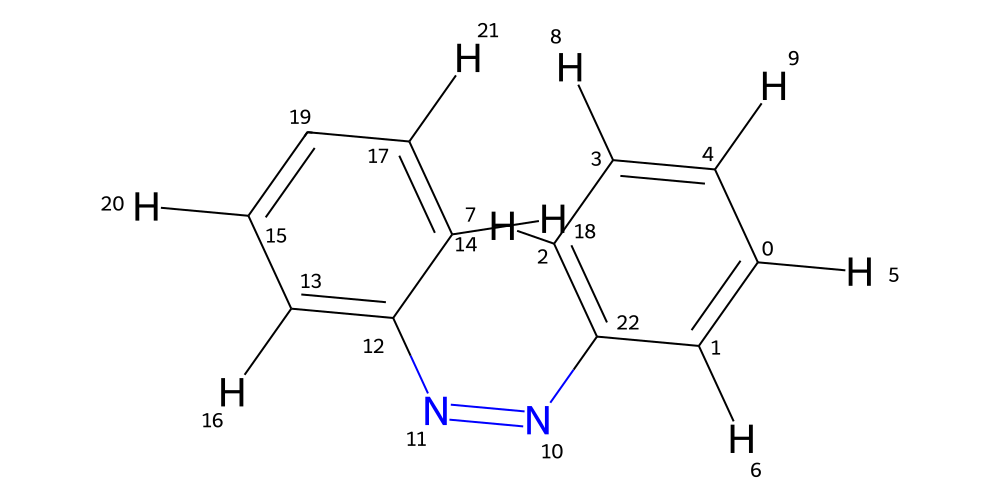

In [20]:
start_mol = Chem.MolFromXYZFile("start.xyz")
DetermineBonds(start_mol,charge = 0)
start_mol = removeAtom(start_mol, 22)
AllChem.Compute2DCoords(start_mol)


fragment_mol = Chem.MolFromXYZFile("fragment.xyz")
DetermineBonds(fragment_mol,charge = 0)
fragment_mol = removeAtom(fragment_mol, 30)
AllChem.Compute2DCoords(fragment_mol)
start_mol

In [17]:
combinedMolecules = combineMolecules(start_mol, fragment_mol, (19,29))
#molFile = Chem.MolToMolBlock(combinedMolecules)

comFile = Mol2COM(combinedMolecules)

head = "%Chk=F1a_ortho.chk\n\
#P RHF/6-31G* Opt"

tail = "--Link1--\n\
%Chk=F1a_ortho.chk\n\
#P HF/6-31G* SCF=Tight Geom=AllCheck Guess=Read\n\
	Pop=MK IOp(6/33=2, 6/41=10, 6/42=17)"

writeCOMFile("Test",head, list(comFile.split("\n"))[5:], tail)